### Train / Test split

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

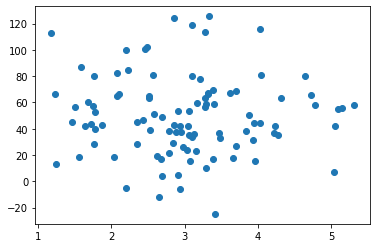

In [17]:
pageSpeed = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100)

plt.scatter(pageSpeed, purchaseAmount)
plt.show()

In [18]:
trainX = pageSpeed[:80]
testX = pageSpeed[80:]

trainy = purchaseAmount[:80]
testy = purchaseAmount[80:]

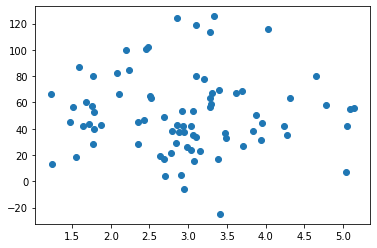

In [19]:
plt.scatter(trainX, trainy)
plt.show()

In [20]:
x = np.array(trainX)
y = np.array(trainy)

p4 = np.poly1d(np.polyfit(x, y, 8))

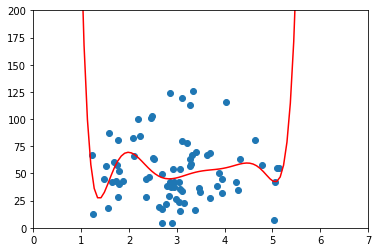

In [21]:
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c="r")
plt.show()

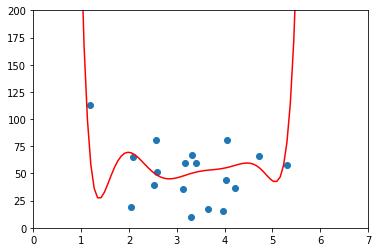

In [22]:
testx = np.array(testX)
testy = np.array(testy)

axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c="r")
plt.show()

In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))
r2

-0.12120962193840445

In [24]:
r2 = r2_score(np.array(trainy), p4(np.array(trainX)))
r2

0.055981669130389156

### Bayesian Methods

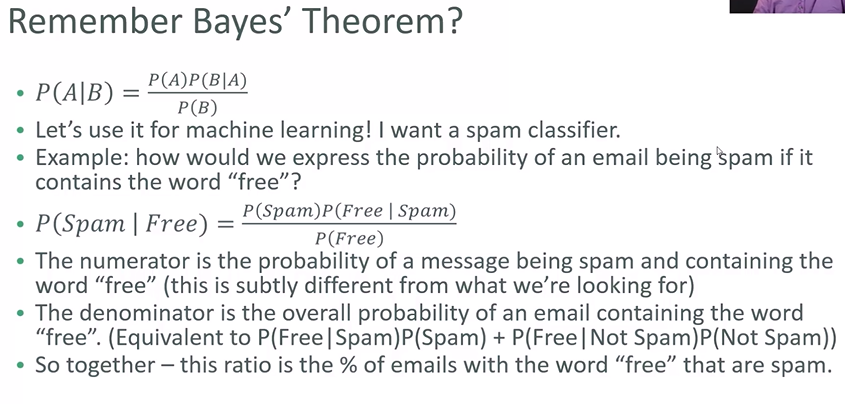

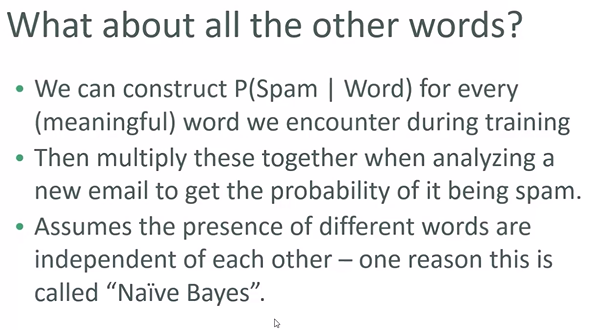

### Naive Bayes

In [29]:
import os
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

In [34]:
def readFiles(path):
    for r, dirname, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(r, filename)
            
            inBody = False
            lines = []
            f = io.open(path, 'r', encoding="latin1")
            for line in f:
                if inBody:
                    lines.append(line)
                elif line =="\n":
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield message

def dfFromDirectory(path, classification):
    rows = []
    for message in readFiles(path):
        rows.append({"message":message, "class":classification})
    
    return pd.DataFrame(rows)

In [35]:
df = pd.DataFrame({"message":[], "class":[]})
df = df.append(dfFromDirectory("emails/spam", "spam"))
df = df.append(dfFromDirectory("emails/ham", "ham"))
df

,message,class
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
3,##############################################...,spam
4,I thought you might like these:\n\n1) Slim Dow...,spam
...,...,...
2495,Man killed 'trying to surf' on Tube train \n\n...,ham
2496,"Hi Gianni,\n\n\n\nA very good resource for thi...",ham
2497,Gianni Ponzi wrote:\n\n> I have a prob when tr...,ham
2498,Neale Pickett <neale@woozle.org> writes:\n\n\n...,ham


In [37]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(df["message"].values)

In [38]:
classifier = MultinomialNB()
targets = df["class"].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
examples = ["DISCOUNT ON THE NEWEST GUCCI FASHION", "Hi, wassup, are yu free tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

### K-Means Clustering

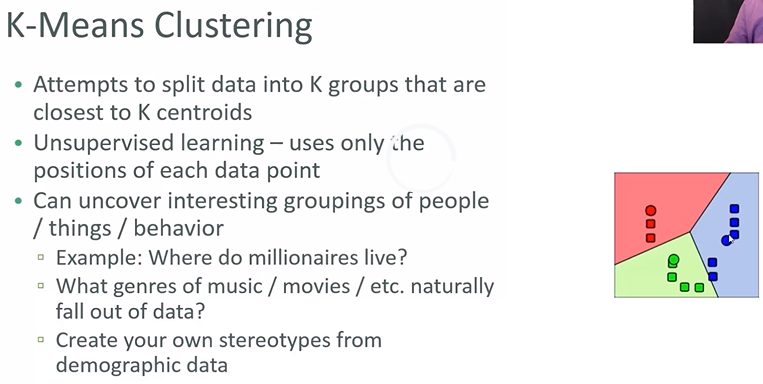

In [51]:
def createClusteredData(N, k):
    np.random.seed(2020)
    pointsPerCluster = float(N)/k
    X = []
    for i in range(k):
        incomeCentroid = np.random.uniform(2000., 200000.)
        ageCentroid = np.random.uniform(20.0, 70.)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.), 
                      np.random.normal(ageCentroid, 2.0)])
    X = np.array(X)
    return X

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

data = createClusteredData(100, 5)

model = KMeans(n_clusters=5)
model = model.fit(scale(data))

In [53]:
model.labels_

array([4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1])

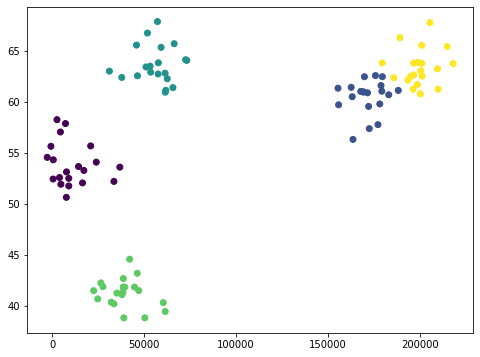

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(np.float))
plt.show()

### Entropy

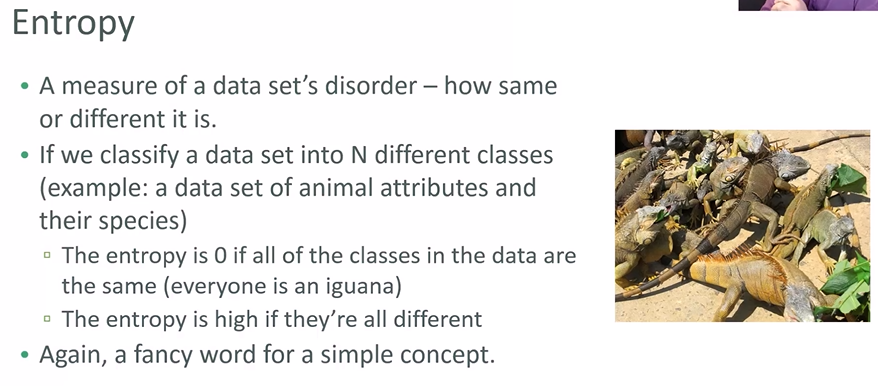

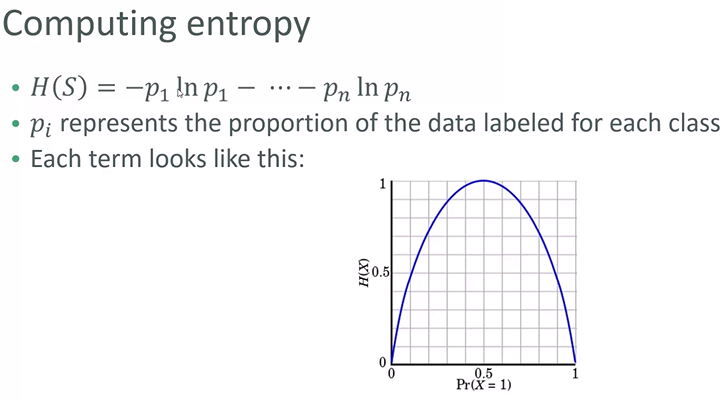